<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regressao_Linear_EUR_USD/Logistic_Regression_on_EUR_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo preditivo supervisionado utilizando ML com Regressão Logística no par FOREX EUR/USD

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.freepik.com%2Ffree-vector%2Fstock-market-forex-trading-graph-graphic-concept_73426-94.jpg&f=1&nofb=1&ipt=cd40318cc1b9cf698d60c3dd51ac5b863ad37b7e60f0ea54bec11d106e55e05d&ipo=images' width='300'>

## Breve introdução:

> **O que é EUR/USD:** Abreviação para a taxa de câmbio entre o Euro e o Dólar Americano. Isso significa quantos dólares americanos você pode comprar com um euro. Por exemplo, se a taxa de câmbio EUR/USD é de 1,20, isso significa que 1 euro equivale a 1,20 dólares americanos. Esta taxa é usada como uma medida da relação entre as duas moedas e é amplamente utilizada como uma referência para o comércio e investimento.

> **O que é Machine Learning (ML):** Machine Learning é um campo da inteligência artificial que dá aos computadores a capacidade de aprender sem serem explicitamente programados. Ele se baseia em algoritmos e estatísticas para permitir que os computadores aprendam com dados, e melhorem suas habilidades a medida que adquirem novos dados. 

> **O que é Regressão Logística:** Técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.



# Sobre esse estudo:

<img src='https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/1cd2810067c045a3bd8faf4ae2783bba6b0508fb/Regressao_Linear_EUR_USD/Atencao_Rotulo.png?raw=true' width='250'>

Esse estudo é destinado somente a exploração do modelo de Regressão Logistica frente a dados históricos do par EUR/USD. Reforço que se trata explicitamente de um estudo (E em minha opinião um divertido experimento), **ou seja, não se trata de nenhuma recomendação ou indicação.**

# Sumário

As etapas gerais que envolvem uma análise de regressão linear com Python incluem:

> **1º Coleta de dados:** Recolher e preparar o conjunto de dados que será usado para a análise. Isso pode incluir a limpeza de dados, o tratamento de valores ausentes e a normalização de variáveis.

> **2º Análise exploratória de dados:** Utilizando ferramentas como gráficos e tabelas para entender a distribuição e relações entre as variáveis no conjunto de dados.

> **3º Seleção de características:** Escolha as variáveis independentes (características) que serão usadas na modelagem.

> **4º Treinamento do modelo:** Utilizando a biblioteca de machine learning do Python, como scikit-learn, para treinar o modelo de regressão linear com o conjunto de dados de treinamento.

> **5º Validação do modelo:** Utilizando métricas de avaliação, como o erro quadrático médio (MSE) ou o coeficiente de determinação (R²), para avaliar a precisão do modelo e verificar se ele generaliza bem para dados desconhecidos.

**NOTA:** As observações contidas em cada etapa são somente para ilustrar o que normalmente se busca em cada passo, como nosso estudo está focado em prática não iremos nos ater a nenhum destes conceitos específicos.

# 1º Passo - Coleta de dados

Para nossa coleta de dados iremos utilizar uma base de dados histórica EUR/USD que poderá ser extraída diretamente pelo site [myfxbook](https://www.myfxbook.com/forex-market/currencies/EURUSD-historical-data).

Eu já deixei uma base de Jan/22 até 13/Fev/23 salva em meu github, [você pode baixá-lo nesse link se quiser.](https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/Regressao_Linear_EUR_USD/LR_EUR_USD.csv)

In [ ]:
# Importdando bibliotecas para dados
import pandas as pd

# Importando dados (Usamos header=1 devido ao cabeçalho estava na segunda linha)
df = pd.read_csv(r'https://raw.githubusercontent.com/LucasPequenoSterzeck/Machine_Learning_LPS/main/Regressao_Linear_EUR_USD/LR_EUR_USD.csv', header=1, index_col=False)

# Visualizando dados
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,01/13/2023 00:00,1.08442,1.08681,1.07803,1.08321,-12.1,-0.11
1,01/12/2023 00:00,1.07538,1.08667,1.07293,1.08506,96.8,0.89
2,01/11/2023 00:00,1.07324,1.07765,1.07256,1.07564,24.0,0.22
3,01/10/2023 00:00,1.07282,1.07595,1.07122,1.07342,6.0,0.06
4,01/09/2023 00:00,1.06387,1.07607,1.06371,1.07327,94.0,0.88
...,...,...,...,...,...,...,...
264,01/07/2022 00:00,1.12950,1.13646,1.12898,1.13592,64.2,0.57
265,01/06/2022 00:00,1.13109,1.13318,1.12847,1.12982,-12.7,-0.11
266,01/05/2022 00:00,1.12841,1.13465,1.12771,1.13125,28.4,0.25
267,01/04/2022 00:00,1.12952,1.13226,1.12724,1.12878,-7.4,-0.07


# 2º Passo - Análise exploratória dos dados

Aqui iremos visualizar as informações presentes em noss banco de dados, não seremos incisivos, iremos somente enteder o dados e visualizá-lo de forma simples.

## Sobre os dados que importamos:

Estrutura: Temos 269 linhas e 7 colunas. Os dados estão organizados em dias, cada dia terá sua respectiva:
- Date: Data
- Open: Abertura
- High: Alta
- Low: Baixa
- Close: Fechamento
- Change (Pips): Variação em pontos
- Change (%): Variação em percentual




In [ ]:
# Visualizando formato das variáveis
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Change(Pips)    float64
Change(%)       float64
dtype: object

In [ ]:
# Variável(Coluna) Date não está em formato correto! Vamos corrigi-lá abaixo:
df.Date = pd.to_datetime(df.Date)

# Reordenando Data para ir da mais antiga para mais recente(no fim)
df.sort_values(by=['Date'], ascending=True, inplace=True)

# Resetando nosso index
df.reset_index(drop=True, inplace=True)

# Verificando novamente, agora vemos que Date está em formato data ( datetime64[ns] )
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Change(Pips)           float64
Change(%)              float64
dtype: object

Visualizando variável do fechamento ao longo do período


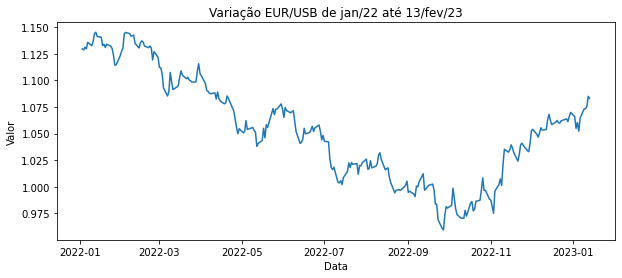


Visualizando candles dia ao longo do período


In [ ]:
# Biblioteca para visualização (Plotagem)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Visualizando variações:
print('Visualizando variável do fechamento ao longo do período')
plt.figure(figsize=(10,4))
plt.title('Variação EUR/USB de jan/22 até 13/fev/23')
plt.ylabel('Valor')
plt.xlabel('Data')
plt.plot(df.Date.values, df.Close.values)
plt.show()

# Visualizando candle's
print('\nVisualizando candles dia ao longo do período')
go.Figure(data=[go.Candlestick(
                x=df.Date.values,
                open=df.Open.values,
                high=df.High.values,
                low=df.Low.values,
                close=df.Close.values)]).show()

Antes de encerrarmos esse tópico, gostaria de somente convídá-lo a visualizar gráficos de outras fontes de dados e verificar se estamos realmente vendo a mesma informação do mercado... 

Se não quiser pesquisar eu já dei uma olhadinha no [google finanças no EUR/USD](https://www.google.com/finance/quote/EUR-USD?sa=X&ved=2ahUKEwiL-svdpMf8AhWQJrkGHXdfBlMQmY0JegQIBxAc&window=1Y) e vi no período 15/01/22 até 13/01/23 praticamente a mesma informação que estamos vendo acima e foram extraídas do [myfxbook](https://www.myfxbook.com/forex-market/currencies/EURUSD-historical-data), veja abaixo:

<img src='https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regressao_Linear_EUR_USD/GoogleFinance_EUR_USD.png?raw=true' width='700'>

[Imagem em maior resolução.](https://github.com/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/Regressao_Linear_EUR_USD/GoogleFinance_EUR_USD.png?raw=true)

# 3º Passo - Seleção de características

Agora chegou o momento de modelarmos o banco de dados e deixar somente as variáveis que iremos realmente utilizar, e talvez até criar alguma para utilizarmos no modelo.


**Retirando uma variávei:** Nesse estudo vamos focar somente nas colunas focadas no preço do ativo,serão elas Abertura, Fechamento, Alta e Baixa, iremos remover as outras colunas.

**Adicionando uma variável:** Vamos criar uma média de 14 períodos baseado no preço de fechamento, dessa forma teremos uma linha de tendência baseado nessa média para auxiliar o modelo.

**Modificando uma variável:** Poderiamos dar a variável 'Close' que representa o fechamento diretamente ao nosso modelo, porém para tornar a previsão mais simples vamos criar uma variável que nos diga se o valor de fechamento referente ao dia anterior subiu(1 / UM) ou desceu(0 / ZERO), dessa forma nosso modelo não tentará prever exatamente o preço do próximo fechamento, mas sim o movimento do próximo fechamento, iremos chamar esa variável de 'Movimento'.

**Modificando um eixo:** Iremos deslocar a nova variável (Movimento) para D-1, dessa forma teremos a relação abertura, baixa, alta e fechamento de hoje para então o movimento de amanhã(Superior/Call ou Inferior/Put). É importante fazermos esse ajuste pois consideremos que você quer saber o movimento que o ativo fará amanhã, para isso você irá alimentar ele com as variáveis que tem do dia anterior buscando prever o dia seguinte.

**Limpeza:** Remover linhas aonde temos valores em branco/vazios.

In [ ]:
# Retirando variável Change(Pips)
df.drop(columns=['Change(Pips)','Change(%)'], inplace=True)

In [ ]:
# Adicionando variável 
df['Med_14'] = df.Close.rolling(14).mean()
df['Med_7'] = df.Close.rolling(7).mean()

# importante ficar que as 14 primeiras linhas estarão vazias 'NaN' pois ele precisa de 14 períodos para ter uma média,
# Apartir da 15ª Linha teremos valor média dos 14 períodos anteriores.

In [ ]:
# Modificando variável Close teremos uma nova variável chamada Movimento
for row in df.iterrows():
  if row[0] > 0 and row[1].Close > rowP[1].Close: df.loc[row[0], 'Movimento'] = 1
  elif row[0] > 0 and row[1].Close < rowP[1].Close: df.loc[row[0], 'Movimento'] = 0
  rowP = row

In [ ]:
# Retrocedendo variável Movimento para o dia anterior:
df.Movimento = df.Movimento.shift(-1)


In [ ]:
# Removento linhas em branco/NaN
df.dropna(inplace=True, axis=0)

In [ ]:
# Visualizando dataframe que iremos usar para o modelo
df

,Date,Open,High,Low,Close,Med_14,Med_7,Movimento
0,2022-01-03,1.13648,1.13786,1.12796,1.12974,NaN,NaN,0.0
1,2022-01-04,1.12952,1.13226,1.12724,1.12878,NaN,NaN,1.0
2,2022-01-05,1.12841,1.13465,1.12771,1.13125,NaN,NaN,0.0
3,2022-01-06,1.13109,1.13318,1.12847,1.12982,NaN,NaN,1.0
4,2022-01-07,1.12950,1.13646,1.12898,1.13592,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
264,2023-01-09,1.06387,1.07607,1.06371,1.07327,1.062641,1.063010,1.0
265,2023-01-10,1.07282,1.07595,1.07122,1.07342,1.063428,1.063504,1.0
266,2023-01-11,1.07324,1.07765,1.07256,1.07564,1.064521,1.064890,1.0
267,2023-01-12,1.07538,1.08667,1.07293,1.08506,1.066323,1.069201,0.0


Terminamos nossa analise com 255 linhas e 8 colunas para usarmos no treinamento e aferição do nosso modelo.

# 4º Passo - Treinamento do modelo

Aqui é aonde a brincadeira começa! Vamos importar um modelo de Machine Learning baseado em Regressão Linear, vamos treiná-lo para então aferir sua precisão.

Não darei muita atenção para as configurações do modelo, tentarei de forma breve somente descrever as ações nos comentários de cada célula de código.

In [ ]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Separando dados para o modelo:
X = df.drop(columns=['Date','Movimento'], axis=1)
y = df['Movimento'].values

# Deixandos dados em mesma escala
scaler = MinMaxScaler().fit(X)
features_scale = scaler.transform(X)

# Separado os dados em conjunto de treino e teste
Xtrain, Xtest, ytrain, ytest=train_test_split(features_scale, y, test_size=0.1, random_state=42, shuffle=False)
# Deixei 5,5% do data-frame para teste, o que deve dar aprox 15 períodos/dias para testarmos a previsão(teste).

# Declarando e treinando modelo
opc1 = {'C': 0.001, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001, 'warm_start': False}
opc2 = {'C': 0.01, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga', 'tol': 0.01, 'warm_start': True}
opc3 = {'C':0.5,'fit_intercept':True,'penalty':'l1','solver':'saga','max_iter': 600}
opc4 = {'C': 0.01, 'fit_intercept': True, 'intercept_scaling': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
opc5 = {'C': 1100, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 120, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag', 'tol': 3, 'warm_start': True}
LR = LogisticRegression(**opc5)
LR.fit(Xtrain, ytrain)
scores = cross_val_score(LR, Xtrain, ytrain, cv=5)

for n in scores:
  print('Nota: ', round(n*100),'%')
print(f'Acurária do modelo: {round(scores.mean()*100,2)}% (+/- {round(scores.std()*2*100,2)}%)\n')


Nota:  50 %
Nota:  50 %
Nota:  50 %
Nota:  67 %
Nota:  49 %
Acurária do modelo: 53.26% (+/- 14.16%)



Já treinamos nosso modelo, com os dados de teste ele apresentou uma acurária de **53,26%**, porém será que esse realmente é o valor que ele vai apresentar quando utilizarmos os dados de teste?

**Consideração:** Se você utilizar parâmetros ou base diferentes com certeza terá percentuais diferentes deste.

Vamos conferir no próximo passo.

**Observação:** Utilizamos um recurso do Sklearn chamado Min_Max_Scaler, ele utiliza a formula abaixo para padronizar os dados presentes deixando-os com média 0 e desvio padrão 1:

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fandroidkt.com%2Fwp-content%2Fuploads%2F2020%2F10%2FSelection_060.png&f=1&nofb=1&ipt=6635fa543a8577abc160769933efe4231b50c0d6d8d3c98d7b909cb23a264306&ipo=images' width='200
'>

Caso queira saber mais sobre métodos de préprocesamento como esse acima irei deixar citações no fim do documento.

# 5º Passo - Validação do modelo

Não iremos nos ater a nenhuma ferramenta específica, vamos somente prever valores presentes em nosso conjunto de teste e vamos ver se essas previsões foram corretas ou não.

In [ ]:
# Criando o loop para comparação com cada movimento real x previsto
win_ = loss_ = 0
for n,xv,yv in zip(range(len(Xtest)),Xtest,ytest):
  print(f"{n+1}ª dia - Real {round(yv)} x Previsto {round(LR.predict(xv.reshape(1,-1))[0])} = {'CORRETO' if yv == LR.predict(xv.reshape(1,-1)) else 'ERRADO'}")
  if yv == LR.predict(xv.reshape(1,-1)): win_ += 1
  else: loss_ += 1
# Imprimindo placar final
print(f'\n** Resultado!\nCORRETAS {win_}\nERRADAS {loss_}\nForam {win_+loss_} tentativas, com assertividade de {round(win_/(win_+loss_)*100,2)}%\n')



1ª dia - Real 1 x Previsto 1 = CORRETO
2ª dia - Real 0 x Previsto 1 = ERRADO
3ª dia - Real 1 x Previsto 1 = CORRETO
4ª dia - Real 1 x Previsto 1 = CORRETO
5ª dia - Real 1 x Previsto 1 = CORRETO
6ª dia - Real 0 x Previsto 1 = ERRADO
7ª dia - Real 0 x Previsto 1 = ERRADO
8ª dia - Real 1 x Previsto 1 = CORRETO
9ª dia - Real 1 x Previsto 1 = CORRETO
10ª dia - Real 0 x Previsto 1 = ERRADO
11ª dia - Real 0 x Previsto 1 = ERRADO
12ª dia - Real 1 x Previsto 1 = CORRETO
13ª dia - Real 1 x Previsto 1 = CORRETO
14ª dia - Real 0 x Previsto 1 = ERRADO
15ª dia - Real 1 x Previsto 1 = CORRETO
16ª dia - Real 1 x Previsto 1 = CORRETO
17ª dia - Real 0 x Previsto 1 = ERRADO
18ª dia - Real 0 x Previsto 1 = ERRADO
19ª dia - Real 1 x Previsto 1 = CORRETO
20ª dia - Real 0 x Previsto 1 = ERRADO
21ª dia - Real 1 x Previsto 1 = CORRETO
22ª dia - Real 1 x Previsto 1 = CORRETO
23ª dia - Real 1 x Previsto 1 = CORRETO
24ª dia - Real 1 x Previsto 1 = CORRETO
25ª dia - Real 1 x Previsto 1 = CORRETO
26ª dia - Real 0 x

Perceba que nosso conjunto de treino gerou uma acurácia de 53,26%, enquanto nosso conjunto de treino 61.54%.

**Conclusão:** Considerando que o modelo nunca viu os dados presentes no conjunto de treino podemos deduzir está sendo consistente em suas previsões acertando pelo menos pouco mais da metade das previsões.

# Referências:

Aqui estão algumas referências que me ajudaram durante o processo de desenvolvimento desse documento.

**1.   Livro:** Machine Learning – Guia de Referência Rápida: Trabalhando com Dados Estruturados em Python

**2.   Livro:** Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems

**3.   Artigo:** [Logistic Regression Model Tuning with scikit-learn — Part 1](https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5)

**4.   Artigo:** [Machine Learning for Humans](https://medium.com/machine-learning-for-humans/why-machine-learning-matters-6164faf1df12)

**5.   Artigo:** [Min Max Scaler](https://medium.com/@ranjitmaity95/min-max-scaler-b2411ab3136d)

**6.   Artigo:** [Cross Validation — Why & How](https://towardsdatascience.com/cross-validation-430d9a5fee22)

**7.   Artigo:** [SKlearn: Pipeline & GridSearchCV](https://medium.com/@cmukesh8688/sklearn-pipeline-gridsearchcv-54f5552bbf4e)

**8.   Documentação:** [Scikit-learn](https://scikit-learn.org/stable/index.html)

**9.   Fundamentos:** [Sigmoidal](https://sigmoidal.ai/)

.

Foi muito gratificante compilar esse estudo, espero que você tenha gostado.

